In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd

In [11]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data(path="mnist.npz")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
test_x.shape

(10000, 28, 28)

In [21]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(y[index])

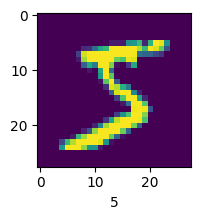

In [22]:
plot_sample(train_x, train_y, 0)

In [25]:
x_train = train_x.reshape(-1, 28, 28, 1).astype('float32')
x_test = test_x.reshape(-1, 28, 28, 1).astype('float32')
y_train = to_categorical(train_y, 10)
y_test = to_categorical(test_y, 10)

In [26]:
model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')    
])

C:\Users\longv\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.7831 - loss: 1.9039 - val_accuracy: 0.9622 - val_loss: 0.1334
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9681 - loss: 0.1083 - val_accuracy: 0.9696 - val_loss: 0.0888
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9802 - loss: 0.0662 - val_accuracy: 0.9793 - val_loss: 0.0692
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9821 - loss: 0.0575 - val_accuracy: 0.9843 - val_loss: 0.0567
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9865 - loss: 0.0439 - val_accuracy: 0.9828 - val_loss: 0.0566
